# **Probabilidad y Estadística** 
# **Proyecto 2: Estadística Descriptiva.** 
# **2025-1**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import wilcoxon
from scipy.stats import binomtest
from scipy.stats import median_abs_deviation
from scipy.stats import iqr
from tabulate import tabulate
from scipy.stats import ttest_rel
from statsmodels.sandbox.stats.runs import runstest_1samp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import mannwhitneyu






In [25]:
def test_normalityKS(data, variable): # Pruaba de Normalidad Kolmogorov-Smirnof 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """  
    print(f"\n Análisis de normalidad por Kolmogorov-Smirnov para '{variable}'")

    # Kolmogorov-Smirnov (KS) test
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f" Estadístico = {ks_stat:.4f}, p-valor = {ks_p:.4f}")
    if ks_p < 0.05:
        print(f"Los datos no provienen de una distribucion normal'{variable}'")
    else:
        print(f"Los datos provienen de una distribucion normal '{variable}'")
    return ks_stat, ks_p
    

def test_normalitySW(data, variable): # Prueba de Normalizas Shapiro-Wilks 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """
    print(f"\n Análisis de normalidad por Shapiro-Wilk para '{variable}'")
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"Estadístico = {shapiro_stat:.4f}, p-valor = {shapiro_p:.4f}")
    if shapiro_p < 0.05:
        print(f"Los datos no provienen de una distribucion normal'{variable}'")
    else:
        print(f"Los datos provienen de una distribucion normal '{variable}'")
    return shapiro_stat, shapiro_p
    
    
def random_test(residuos):
    """
    Parameters
    ----------
    residuos : Array
        DESCRIPTION: Residuos del ANOVA 

    Returns
    -------
    None.

    """
    _, p_runs = runstest_1samp(residuos, correction=True)

    print(f"Prueba de Runs: p-valor={p_runs}")
    
def test_homogeneityL(var1, var2, name1, name2): # Prueba de levene
    """
    var1 y var2: variables a las que se corroborará homocedasticidad 
    name1 y name2: strings con el nnombre de las variables
    """
    print(f"\n Análisis de homocedasticidad entre '{name1}' y '{name2}'")

    # Prueba de Levene (no asume normalidad)
    levene_stat, levene_p = stats.levene(var1, var2)
    print(f"Levene test: Estadístico = {levene_stat:.4f}, p-valor = {levene_p:.4f}")

def t_test_one(data,mu,variable): #Prueba T para una muestra
    """
    data: arreglo de datos a comparar
    mu: media poblacional o valor de referencia 
    variable: string con el nombre de la variable que se está comparando
    """
    print(f"Prueba T para una sola muestra para {variable}")
    t_stat, p_value = stats.ttest_1samp(data, mu)
    print(f"Estadístico = {t_stat:.4f}, valor_p = {p_value:.4f}")
    
def box_cox(data): #transformación depotencia   

    transformed_data, lambda_opt = stats.boxcox(data)
    return transformed_data, lambda_opt

def tukey(respuesta,factor, alfa,n_factor):
    """

    Parameters
    ----------
    respuesta : Array
        DESCRIPTION. Array con los datos de la variable respuesta
    factor : Array
        DESCRIPTION.Array con los niveles del factor 
    alfa : Float
        DESCRIPTION. Valor alfa de comparación 
    n_factor : String
        DESCRIPTION. Nombre del factor

    Returns
    -------
    None.

    """
    
    tukey = pairwise_tukeyhsd(respuesta, factor, alpha=alfa)
    print(f"Prueba Tukey para el factor {n_factor}")
    print(tukey)
    
def kruskal_W(df,Respuesta,Factor):
    """
    
    Parameters
    ----------
    df : Data_Frame
        DESCRIPTION. estructura con los datos del experimento
    Respuesta : String
        DESCRIPTION. nombre de la variable respuesta, key del dataframe
    Factor : String
        DESCRIPTION. nombre del factor, key del dataframe

    Returns
    -------
    None.

    """
    grupos_B = [df[Respuesta][df[Factor] == nivel] for nivel in df[Factor].unique()]
    stat_B, p_B = stats.kruskal(*grupos_B)
    print(f"Kruskal-Wallis para {Factor}: H = {stat_B:.4f}, p = {p_B:.4f}")
    
    
def kruskal_interaccion(df,Respuesta,Factor1,Factor2):
    """
    

    Parameters
    ----------
    df : Data_Frame
        DESCRIPTION. estructura con los datos del experimento
    Respuesta : String
        DESCRIPTION. nombre de la variable respuesta, key del dataframe
    Factor1 : String
        DESCRIPTION. nombre del factor1, key del dataframe
    Factor2 : String
        DESCRIPTION.nombre del factor12, key del dataframe

    Returns
    -------
    None.

    """
def U_Mann_W (datos1,datos2):# pruba U Mann Withney
    """
    datos1: primer set de datos a comparar
    datos2: segundo set de datos a comparar
    """
    # Prueba de Mann-Whitney
    stat, p_value = mannwhitneyu(datos1, datos2, alternative='two-sided')
    # Mostrar resultados
    print(f"Estadístico U: {stat}")
    print(f"P-valor: {p_value:.4f}")
def t_test_paired (before,after):#prueba T para datos pareados
    """
    before: variable antes 
    after: variable después
    """
    
    t_stat, p_value = ttest_rel(before, after)

    # Mostrar resultados
    
    print(f"Prueba t para muestras pareadas, P-valor: {p_value:.4f}")
def wilcoxon_test (data,mediana=0,y=None):# prueba Wilcoxon 
    """
    data: datos de la variable a comparar, puede ser la primera (antes) si se hara para dos
    mediana=valor de la mediana estándar o de referencia, si la prueba es de dos muestras no se modifica mediana
    y=los valores de la segunda variable a comparar (después), si la muestra es de solo una muestra, entonces None
    """
    # Prueba de Wilcoxon (hipótesis:
    stat, p_value = wilcoxon(data - mediana,y)
    
    print(f"Estadístico de Wilcoxon: {stat:.4f}, p-valor: {p_value:.4f}")
def estadisticos(columna):  # Función que recibe una columna numérica (por ejemplo: 'AVE ORAL M')
    # Convierte los datos a formato numérico, ignorando errores (por si hay strings u otros)
    data = pd.to_numeric(columna, errors='coerce')

    # Métricas centrales clásicas
    media = data.mean()              # Media aritmética
    mediana = data.median()         # Mediana (percentil 50)
    moda = data.mode().iloc[0] if not data.mode().empty else np.nan  # Moda (si hay varias, toma la primera)

    # Dispersión
    sd = data.std()                 # Desviación estándar

    # Desviación absoluta mediana (menos sensible a outliers que SD)
    mad = median_abs_deviation(data, nan_policy='omit')

    # Varianza (cuadrado de la desviación estándar)
    varianza = data.var()

    # Coeficiente de variación (SD respecto a la media) → útil para comparar dispersión relativa
    cv = (sd / media) * 100

    # Coeficiente de variación usando MAD (más robusto a outliers)
    cvm = (mad / mediana) * 100

    # Cuartiles
    Q1 = data.quantile(0.25)        # Primer cuartil (percentil 25)
    Q2 = data.quantile(0.5)         # Segundo cuartil (mediana)
    Q3 = data.quantile(0.75)        # Tercer cuartil (percentil 75)

    # Rango intercuartílico (IQR) = Q3 - Q1 → mide la dispersión entre el 25% y 75%
    iqr_val = Q3 - Q1

    # Cálculo de los límites para detectar outliers (regla de Tukey)
    LInferior = Q1 - 1.5 * iqr_val  # Límite inferior
    LSuperior = Q3 + 1.5 * iqr_val  # Límite superior


    # Se agrupan todos los resultados en una Serie de pandas
    stats = pd.Series({
        "Media": media,
        "Mediana": mediana,
        "Moda": moda,
        "SD": sd,
        "MAD": mad,
        "Varianza": varianza,
        "IQR": iqr_val,
        "CV": cv,
        "CVM": cvm,
        "Q1": Q1,
        "Q2": Q2,
        "Q3": Q3,
        "LInferior": LInferior,
        "LSuperior": LSuperior,
    }).round(2)

    return stats

def outliers_(datos):
        # Cuartiles
    Q1 = datos.quantile(0.25)        # Primer cuartil (percentil 25)
    Q2 = datos.quantile(0.5)         # Segundo cuartil (mediana)
    Q3 = datos.quantile(0.75)        # Tercer cuartil (percentil 75)

    # Rango intercuartílico (IQR) = Q3 - Q1 → mide la dispersión entre el 25% y 75%
    iqr_val = Q3 - Q1

    # Cálculo de los límites para detectar outliers (regla de Tukey)
    LInferior = Q1 - 1.5 * iqr_val  # Límite inferior
    LSuperior = Q3 + 1.5 * iqr_val  # Límite superior

    # Detección de valores atípicos
    outliers_ = datos[(datos < LInferior) | (datos > LSuperior)]
    Outliers = outliers_.round(2) if not outliers_.empty else 'Sin outliers'
    print(Outliers)
    return Outliers

## *Parte 1. Comparación de Muestras (50%)* 
**Se busca determinar si la técnica de medición de la temperatura con el 
termógrafo es equivalente al estándar de medición con un termómetro oral. 
Para esto deberá comparar 4 zonas diferentes de las evaluadas en el 
estudio, con la temperatura oral para determinar a través de pruebas de 
hipótesis si se trata de muestras equivalentes.  
Como en todos los casos las mediciones se hicieron 4 veces, deberá 
encontrar el promedio de cada unas de las 4 zonas. **

# **Analisis Exploratorio**

In [4]:
df=pd.read_csv('FLIR_groups1and2.csv', sep=';', header=2)
df['MaxRProm']=df.loc[:, ['Max1R13_1','Max1R13_2','Max1R13_3','Max1R13_4']].mean(axis=1)
df['MaxLProm']=df.loc[:, ['Max1L13_1','Max1L13_2','Max1L13_3','Max1L13_4']].mean(axis=1)
df['T_MaxProm']=df.loc[:, ['T_Max1','T_Max2','T_Max3','T_Max4']].mean(axis=1)
df['T_FHCCProm']=df.loc[:, ['T_FHCC1','T_FHCC2','T_FHCC3','T_FHCC4']].mean(axis=1)
columnas=["aveOralM","MaxRProm","MaxLProm","T_MaxProm","T_FHCCProm"]
datos=pd.DataFrame()
for i in columnas:
  datos[i]=df[i]
datos

,aveOralM,MaxRProm,MaxLProm,T_MaxProm,T_FHCCProm
0,36.59,35.0300,35.3775,35.6925,33.5775
1,37.19,34.5500,34.5200,35.1750,34.0325
2,37.34,35.6525,35.5175,35.9125,34.9000
3,37.09,35.2225,35.6125,35.7200,34.4400
4,37.04,35.5450,35.6650,35.8950,35.0900
...,...,...,...,...,...
1015,36.99,35.6425,35.6525,36.0675,35.1075
1016,37.19,35.9825,35.7575,36.5000,35.3100
1017,37.59,36.4075,36.3400,36.5350,35.4350
1018,37.29,35.8150,35.5250,35.8600,34.8400


In [5]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aveOralM    1020 non-null   float64
 1   MaxRProm    1020 non-null   float64
 2   MaxLProm    1020 non-null   float64
 3   T_MaxProm   1020 non-null   float64
 4   T_FHCCProm  1020 non-null   float64
dtypes: float64(5)
memory usage: 40.0 KB


In [6]:
datos.columns

Index(['aveOralM', 'MaxRProm', 'MaxLProm', 'T_MaxProm', 'T_FHCCProm'], dtype='object')

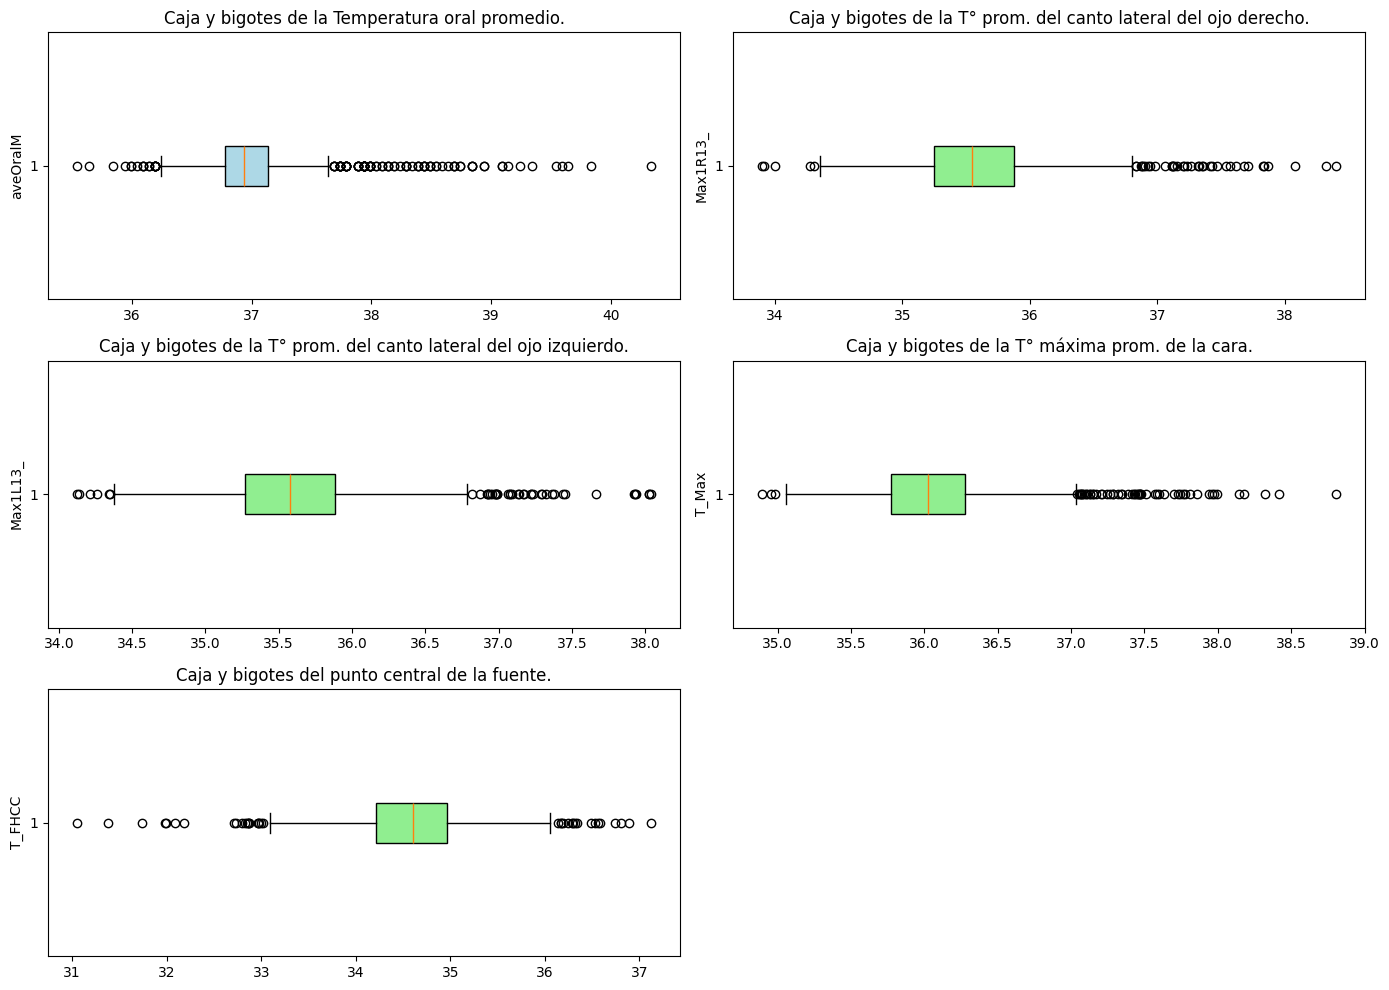

In [7]:
# Se crea una figura general para alojar 4 gráficos de caja (boxplots)
plt.figure(figsize=(14, 10))

# ----------- Boxplot de 'aveOralM' (Temperatura oral promedio) -----------
plt.subplot(3, 2, 1)  # Ubicación: fila 1, columna 1
# Se crea un gráfico de caja horizontal con color de fondo azul claro
plt.boxplot(df['aveOralM'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Caja y bigotes de la Temperatura oral promedio.')
plt.ylabel('aveOralM')  # Etiqueta del eje Y (aunque es horizontal)

# ----------- Boxplot de 'T_atm' (Temperatura ambiente) -----------
plt.subplot(3, 2, 2)  # Ubicación: fila 1, columna 2
plt.boxplot(df['MaxRProm'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Caja y bigotes de la T° prom. del canto lateral del ojo derecho.')
plt.ylabel('Max1R13_')

# ----------- Boxplot de 'Humidity' (Humedad relativa) -----------
plt.subplot(3, 2, 3)  # Ubicación: fila 2, columna 1
plt.boxplot(df['MaxLProm'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Caja y bigotes de la T° prom. del canto lateral del ojo izquierdo.')
plt.ylabel('Max1L13_')

# ----------- Boxplot de 'Max1R13_' (Temperatura medida en el canto lateral del ojo derecho) -----------
plt.subplot(3, 2, 4)  # Ubicación: fila 2, columna 2
plt.boxplot(df['T_MaxProm'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Caja y bigotes de la T° máxima prom. de la cara.')
plt.ylabel('T_Max')

# ----------- Boxplot de 'Max1R13_' (Temperatura medida en el canto lateral del ojo derecho) -----------
plt.subplot(3, 2, 5)  # Ubicación: fila 2, columna 2
plt.boxplot(df['T_FHCCProm'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Caja y bigotes del punto central de la fuente.')
plt.ylabel('T_FHCC')


# Muestra todos los gráficos generados
plt.tight_layout()   # Ajuste automático de los espacios entre los gráficos
plt.show()

In [8]:
#Cálculo de estadisticos:
stadistics = pd.DataFrame()
for i in datos.columns:
    stadistics[i] = estadisticos(datos[i])
stadistics


,aveOralM,MaxRProm,MaxLProm,T_MaxProm,T_FHCCProm
Media,37.03,35.60,35.61,36.08,34.57
Mediana,36.94,35.55,35.58,36.03,34.61
Moda,36.89,35.68,35.66,36.03,34.41
SD,0.51,0.57,0.55,0.49,0.67
MAD,0.20,0.31,0.31,0.25,0.37
Varianza,0.26,0.33,0.30,0.24,0.45
IQR,0.36,0.62,0.61,0.51,0.75
CV,1.38,1.62,1.54,1.36,1.94
CVM,0.54,0.87,0.86,0.70,1.07
Q1,36.78,35.25,35.27,35.78,34.21


In [9]:
#Outliers:
for i in datos.columns:
    print( outliers_(datos[i]))

14      37.79
22      36.14
43      35.99
59      37.79
66      37.99
        ...  
955     38.39
958     37.94
976     37.69
998     38.74
1011    37.79
Name: aveOralM, Length: 108, dtype: float64
None
72     37.33
78     36.84
81     37.16
122    38.33
132    37.43
136    37.54
155    36.88
156    37.36
166    34.00
261    37.57
262    37.47
292    37.11
301    37.42
342    34.27
389    33.92
495    37.68
533    37.35
560    36.87
645    37.84
648    37.83
688    37.27
691    36.83
697    37.20
699    36.93
708    36.94
709    36.98
712    37.62
731    37.24
749    36.90
751    36.88
761    37.32
770    37.06
799    38.08
800    37.71
837    37.12
839    37.87
845    37.13
874    38.40
883    34.31
897    33.90
958    37.12
998    37.21
Name: MaxRProm, dtype: float64
None
81     36.94
122    38.03
132    37.17
136    37.33
149    34.35
156    37.46
261    37.92
262    37.17
274    34.26
292    37.38
358    36.97
374    34.34
490    36.92
495    37.66
533    37.08
645    37.94
648    

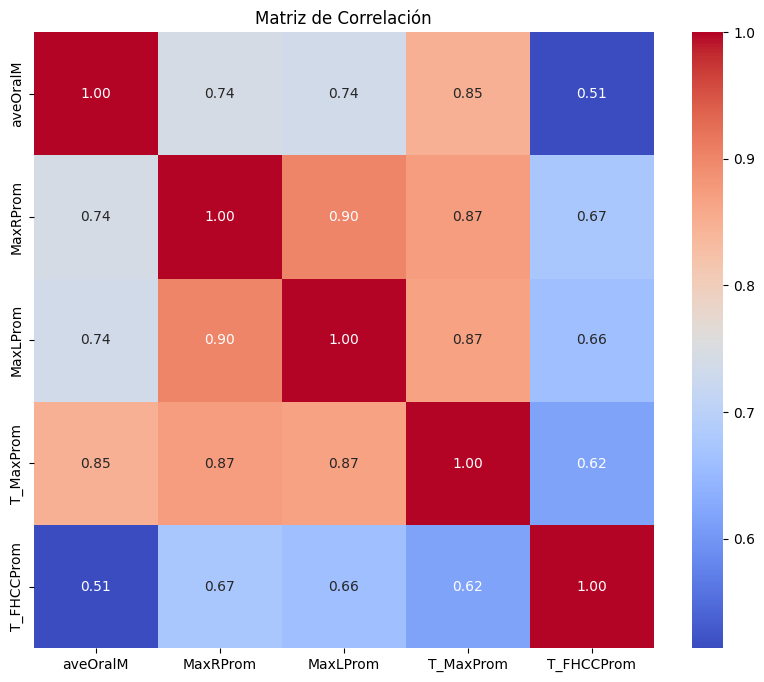

In [10]:
# Calcular la matriz de correlación solo para columnas numéricas del DataFrame 'df'
matriz_corr = datos.corr(numeric_only=True)  # Evita errores al excluir columnas no numéricas

# # Imprimir la matriz de correlación en consola
# print(matriz_corr)

# Crear una nueva figura con un tamaño específico
plt.figure(figsize=(10, 8))

# Generar un mapa de calor (heatmap) con la matriz de correlación
# - annot=True muestra los valores en cada celda
# - cmap='coolwarm' usa una paleta de colores que va del azul (negativo) al rojo (positivo)
# - fmt=".2f" limita los valores a 2 decimales
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")

# Título del gráfico
plt.title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()


# **Análisis para pruebas parametricas y NO parametricas**

Cuando obtenemos una muestra de datos, es importante determinar si el efecto observado podría deberse al azar. Para ello, se realizan pruebas estadísticas y se comparan los resultados con un valor de referencia, normalmente basado en una distribución normal. Este tipo de prueba se denomina prueba de hipótesis para dos muestras.


La prueba t permite conocer si la media de una muestra difiere o no a un valor de referencia. Su supuesto es de que los datos son normales. Este tipo de prueba parten del analisis de realizar pruebas parametricas o no, si el supuesto de la prueba es normalidad y homogeneidad de varianza se realiza pruebas parametricas, en caso contrario, realizamos pruebas no parametricas.

Para aplicar pruebas paramétricas es necesario evaluar ciertos supuestos, entre ellos la independencia de las observaciones. En este caso, se concluye que las variables no son independientes, ya que corresponden a mediciones de temperatura realizadas en distintas partes del rostro de un mismo sujeto. Estas mediciones están relacionadas entre sí, dado que reflejan el mismo estado fisiológico. Por ejemplo, si un individuo presenta fiebre, se espera que todas las temperaturas tomadas en diferentes zonas corporales estén influenciadas por esta condición sistémica. Por tanto, las variables dependen del estado del sujeto y entre sí.

- AveOralM: Temperatura oral
- Max1R13: Temperatura maxima de la cuenca del ojo derecho 
- Max1L13: Temperatura maxima de la cuenca del ojo izquierdo
- T_FHCC : Temperatura promedio en el centro de la frente
- T_max : Temperatura maxima del rostro 

Realizamos la prueba T de muestras pareadas, y wilcoxon en temperatura oral promedio  y temperatura ya que no siguen una distribucion normal.

In [ ]:
#Diferencia entre la temperatura corporal promedio y la temperatura medida en diferentes secciones del rostro       

datos['Dif1'] = datos['aveOralM'] - datos['MaxRProm']
datos['Dif2']= datos['aveOralM'] - datos['MaxLProm']
datos['Dif3'] = datos['aveOralM'] - datos['T_MaxProm']
datos['Dif4'] = datos['aveOralM'] - datos['T_FHCCProm']

# Realizamos la prueba de normalidad de Kolmogorov-Smirnov para las diferencias

test_normalityKS(datos['Dif1'], 'Normalidad de las diferencias entre aveOralM y MaxRProm')
test_normalityKS(datos['Dif2'], 'Normalidad de las diferencias entre aveOralM y MaxLProm')
test_normalityKS(datos['Dif3'], 'Normalidad de las diferencias entre aveOralM y T_MaxProm')
test_normalityKS(datos['Dif4'], 'Normalidad de las diferencias entre aveOralM y T_FHCCProm')

# Realizamos la prueba t de muestras pareadas para las variables que siguen el supuesto de normalidad

t_test_paired(datos['aveOralM'], datos['MaxRProm'])
t_test_paired(datos['aveOralM'], datos['MaxLProm'])
t_test_paired(datos['aveOralM'], datos['T_MaxProm'])

#Prueba de Wilcoxon para las variables que no siguen el supuesto de normalidad
#Transformación de Box-Cox para la variable T_FHCCProm y la variable aveOralM
dn,l=box_cox(datos['aveOralM'])
dn2=(datos['T_FHCCProm'])**l
datos['Dif40']=(dn-dn2)
# Realizamos la prueba de wilcoxon ya que no cumple con el supuesto de normalidad para pruebas parametricas
wilcoxon(datos['aveOralM'],datos['T_FHCCProm'])

# Se trata de eliminar los outliers de la muestra de datos 
# estadisticos(datos['Dif4'])
# OU=outliers_(datos['Dif4'])
# size = len(outliers_(datos['Dif4']))
# print(f"El número de outliers es: {size}")
# datos_filtrados = datos[~datos['Dif4'].index.isin(OU.index)]
# test_normalityKS(datos['Dif4'], 'Normalidad de las diferencias entre aveOralM y T_FHCCProm')



 Análisis de normalidad por Kolmogorov-Smirnov para 'Normalidad de las diferencias entre aveOralM y MaxRProm'
 Estadístico = 0.0298, p-valor = 0.3196
Los datos provienen de una distribucion normal 'Normalidad de las diferencias entre aveOralM y MaxRProm'

 Análisis de normalidad por Kolmogorov-Smirnov para 'Normalidad de las diferencias entre aveOralM y MaxLProm'
 Estadístico = 0.0312, p-valor = 0.2671
Los datos provienen de una distribucion normal 'Normalidad de las diferencias entre aveOralM y MaxLProm'

 Análisis de normalidad por Kolmogorov-Smirnov para 'Normalidad de las diferencias entre aveOralM y T_MaxProm'
 Estadístico = 0.0286, p-valor = 0.3668
Los datos provienen de una distribucion normal 'Normalidad de las diferencias entre aveOralM y T_MaxProm'

 Análisis de normalidad por Kolmogorov-Smirnov para 'Normalidad de las diferencias entre aveOralM y T_FHCCProm'
 Estadístico = 0.0664, p-valor = 0.0002
Los datos no provienen de una distribucion normal'Normalidad de las diferenci

(np.float64(0.06641767651833164), np.float64(0.00023471623625890423))

Al realizar las pruebas estadísticas se encontró que la media de la temperatura oral difiere significativamente con respecto a las demás variables. Esto indica que las temperaturas medidas en distintas secciones del rostro presentan diferencias estadísticamente significativas. A partir de estos resultados, se infiere que la temperatura registrada mediante el termógrafo infrarrojo varía dependiendo del sitio de medición facial, lo que sugiere una posible limitación en la consistencia de las lecturas según la zona evaluada. 
El valor p cercano a cero en la prueba t para muestras pareadas indica que la probabilidad de que las diferencias observadas ocurran por azar es prácticamente nula. Al intentar eliminar los valores atípicos directamente desde las muestras originales, la distribución de los datos continúa sin ajustarse a una distribución normal, lo que demuestra que dicha eliminación no genera un cambio significativo en la normalidad. Incluso después de aplicar una transformación de Box-Cox, los datos no alcanzan la normalidad. Por ello, se optó por aplicar la prueba no paramétrica de Wilcoxon, la cual confirmó que existe una diferencia significativa cuando la temperatura es medida con el termógrafo infrarrojo.

# ***Parte 2: Análisis de Varianza***

Factores del Experimento: 
* Recubrimiento de la Nanopartícula: 3 para ausente y 4 con recubrimiento de PEG.   
* Tiempo de exposición: 1 o 7 días  
* Estímulo: 1 y 2 (dos diferentes estímulos) 
* **Variable Respuesta:** Porcentaje de viabilidad celular. 

In [12]:
#Importación del excel.
df1=pd.read_excel("A375.xlsx")
df1.head(10)


,Bloque2,Estimulo2,Tiempo2,Viabilidad2
0,3,1,7,59.751553
1,3,1,1,75.041876
2,3,2,1,75.376884
3,3,1,7,80.171885
4,3,1,7,80.171885
5,3,2,7,82.608696
6,3,2,1,88.921283
7,3,2,7,89.257213
8,3,2,7,89.257213
9,3,1,1,91.489362


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bloque2      24 non-null     int64  
 1   Estimulo2    24 non-null     int64  
 2   Tiempo2      24 non-null     int64  
 3   Viabilidad2  24 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 900.0 bytes


In [14]:
df1.shape

(24, 4)

In [15]:
df1.columns

Index(['Bloque2', 'Estimulo2', 'Tiempo2', 'Viabilidad2'], dtype='object')

In [16]:
#Se calculan los estadisticos de la VARIABLE RESPUESTA
st=pd.DataFrame()
st["Viabilidad"]=estadisticos(df1['Viabilidad2'])
st


,Viabilidad
Media,101.88
Mediana,98.61
Moda,80.17
SD,23.55
MAD,18.06
Varianza,554.72
IQR,31.39
CV,23.12
CVM,18.31
Q1,87.34


In [17]:
#Outliers
print(outliers_(df1['Viabilidad2']))

Sin outliers
None


In [18]:
test_normalitySW(df1['Viabilidad2'],'Variable Respuesta')


 Análisis de normalidad por Shapiro-Wilk para 'Variable Respuesta'
Estadístico = 0.9614, p-valor = 0.4675
Los datos provienen de una distribucion normal 'Variable Respuesta'


(np.float64(0.9614157741121585), np.float64(0.46752540047534846))

La variable respuesta es normal 

In [19]:
#Separamos los datos en grupos 

#Factor de Bloque
nivel1=df1[df1['Bloque2'] == 3]['Viabilidad2']
nivel2=df1[df1['Bloque2'] == 4]['Viabilidad2']

#Factor de Estimulo 
nivel1E=df1[df1['Estimulo2'] == 2]['Viabilidad2']
nivel2E=df1[df1['Estimulo2'] == 1]['Viabilidad2']

#Factor de Tiempo 

nivel1T=df1[df1['Tiempo2'] == 1]['Viabilidad2']
nivel2T=df1[df1['Tiempo2'] == 7]['Viabilidad2']

#Realizamos la prueba de homocedasticidad 
_,levene=stats.levene(nivel1,nivel2)
print(f'Levene test Bloque: p-valor={levene:.4f}')
_,levene=stats.levene(nivel1E,nivel2E)
print(f'Levene test Estimulo: p-valor={levene:.4f}')
_,levene=stats.levene(nivel1T,nivel2T)
print(f'Levene test Tiempo: p-valor={levene:.4f}')


Levene test Bloque: p-valor=0.4728
Levene test Estimulo: p-valor=0.3440
Levene test Tiempo: p-valor=0.1753


- Dado que en todos los facotores el valor de P>0.05, se puede afirmar que los factores son HOMOCEDASTICOS.
- Teniendo en cuenta que los factores como estimulo, tiempo y bloque, no tienen una relación entre si, se concluye que son datos independientes.


Los datos cumplen con todos los supuestos:
1 Los residuos son normales con media 0.
2 Los resiudos son independientes y aleatorios.
3 La variable respuesta sigue una distribución normal.
4 Hay homocedasticidad entre factores.
5 Hay independencia entre puntos experimentales.

# **Prueba ANOVA**
## El análisis de varianza es una prueba estadística que permite conocer si los factores de un experimento dado, tienen efecto sobre la variable respuesta. Estas pruebas se basan en modelos lineales de la siguiente forma:

In [20]:
modelo=ols('Viabilidad2 ~ C(Bloque2)*C(Estimulo2)*C(Tiempo2)', data=df1).fit()

anova_table = sm.stats.anova_lm(modelo, typ=2)
print(tabulate(anova_table,headers='keys',tablefmt='heavy_grid'))

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃                                    ┃    sum_sq ┃   df ┃          F ┃        PR(>F) ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Bloque2)                         ┃ 5261.22   ┃    1 ┃  19.8512   ┃   0.000398637 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Estimulo2)                       ┃ 1025.18   ┃    1 ┃   3.86813  ┃   0.0668032   ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Tiempo2)                         ┃ 1784.31   ┃    1 ┃   6.73241  ┃   0.0195505   ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Bloque2):C(Estimulo2)            ┃  172.001  ┃    1 ┃   0.648979 ┃   0.432288    ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Bloque2):C(Tiempo2)              ┃   27

In [21]:
modelo=ols('Viabilidad2 ~ C(Bloque2)*C(Estimulo2)*C(Tiempo2)', data=df1).fit()
#Se elimina la primera interaccion: Bloque, tiempo y estimulo. El valor p es mayor a 0.05 por lo tanto no es significativo
modelo=ols('Viabilidad2 ~ C(Bloque2)+C(Estimulo2)+C(Tiempo2)+C(Bloque2):C(Estimulo2)+C(Bloque2):C(Tiempo2)+ C(Estimulo2):C(Tiempo2) ', data=df1).fit()
#Se elimina la segunda interaccion Bloque:Tiempo, el valor p es mayor a 0.05 por lo tanto no es significativo
modelo=ols('Viabilidad2 ~ C(Bloque2)+C(Estimulo2)+C(Tiempo2)+C(Bloque2):C(Estimulo2)+C(Estimulo2):C(Tiempo2)', data=df1).fit()
# Se elimina la tercera interaccion Estimulo:Tiempo, el valor p es mayor a 0.05 por lo tanto no es significativo
modelo=ols('Viabilidad2 ~ C(Bloque2)+C(Estimulo2)+C(Tiempo2)+C(Bloque2):C(Estimulo2)', data=df1).fit()
# Se elimina la cuarta interaccion Bloque:Estimulo, el valor p es mayor a 0.05 por lo tanto no es significativo
modelo=ols('Viabilidad2 ~ C(Bloque2)+C(Estimulo2)+C(Tiempo2)', data=df1).fit()

anova_table = sm.stats.anova_lm(modelo, typ=2)
print(tabulate(anova_table,headers='keys',tablefmt='heavy_grid'))

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃              ┃   sum_sq ┃   df ┃         F ┃        PR(>F) ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Bloque2)   ┃  5261.22 ┃    1 ┃  23.347   ┃   0.000101262 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Estimulo2) ┃  1025.18 ┃    1 ┃   4.5493  ┃   0.0455109   ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Tiempo2)   ┃  1784.31 ┃    1 ┃   7.91799 ┃   0.0107223   ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Residual     ┃  4506.97 ┃   20 ┃ nan       ┃ nan           ┃
┗━━━━━━━━━━━━━━┻━━━━━━━━━━┻━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━━━━━┛


Basado en la tabla , los unicos factores que tienen un efecto significativo en la viabilidad celular son: bloque, tiempo y estimulo.


 Análisis de normalidad por Shapiro-Wilk para 'Residuos'
Estadístico = 0.9742, p-valor = 0.7696
Los datos provienen de una distribucion normal 'Residuos'
Prueba T para una sola muestra para Residuos
Estadístico = 0.0000, valor_p = 1.0000
Prueba de Runs: p-valor=0.8609237034263656


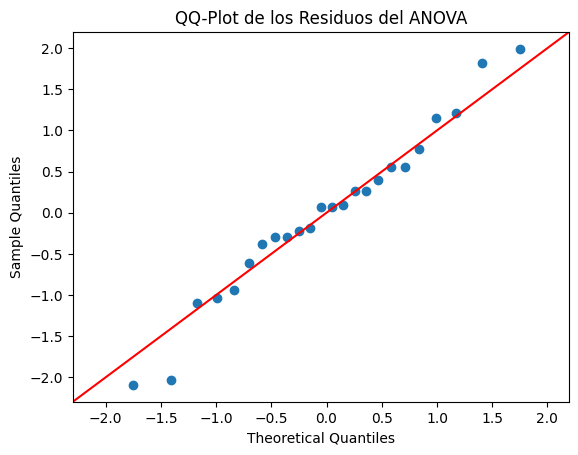

In [22]:
#Extracción de residuos

df1['Residuos']=modelo.resid

# normalidad en los residuos

test_normalitySW(df1['Residuos'],'Residuos')

t_test_one(df1['Residuos'],0,"Residuos")

random_test(df1['Residuos'])
runstest_1samp(df1['Residuos'], correction=True)

sm.qqplot(df1['Residuos'], line='45', fit=True)
plt.title("QQ-Plot de los Residuos del ANOVA")
plt.show()

Al realizar la extraccion de los residuos se obtiene la conclusion de que:
- Los errores o residuos son independientes y aleatorios. Prueba runs p>0.05 
- Los errores o residuos son normales con media 0 ya que la prueba test one es: p>0.05


## ¿Se deben realizar comparaciones múltiples, prueba de Tukey?
### No, ya que estas pruebas son realizadas en Factores con 3 o más niveles, que no aplica en este caso, ya que cada factor tiene únicamente 2 niveles.

#### 
En conclusión, de acuerdo con el ANOVA realizado, se puede determinar que, aunque de forma individual el recubrimiento, el tiempo y el estímulo tienen un efecto significativo, las interacciones entre estos factores no presentan un efecto significativo sobre la variable respuesta, que en este caso es el porcentaje de viabilidad celular. 

Esto sugiere que exponer células cancerígenas a nanopartículas de oro (AuNPs), aplicar un estímulo de radiofrecuencia y el uso independiente de PEG (polietilenglicol) pueden influir de manera significativa por separado, pero no hay evidencia estadística suficiente que indique que la combinación simultánea de estos factores amplifique o modifique ese efecto.Por tanto, aunque el PEG puede aumentar el tiempo de circulación de las nanopartículas y facilitar su llegada al tejido conectivo, ese efecto no depende de una interacción específica con los otros factores considerados en el estudio.